In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pyarrow import parquet as pq
#from hostess import s3
import pdr
from gPhoton.pipeline import execute_pipeline
import numpy as np
import warnings

In [50]:
BUCKET_NAME = 'uraniborg-sieve-7738937'

In [2]:
mcat = pd.read_csv('../glcat_v1_pipeline/mcat_mast_list.csv')

In [6]:
meta = pq.read_table('../glcat_v1_pipeline/visit_metadata.parquet').to_pandas()

In [27]:
for k in meta.keys():
    print(k)

COMMENT
NUVFILE
NUVFILE_comment
FUVFILE
FUVFILE_comment
NUVWTFIL
NUVWTFIL_comment
FUVWTFIL
FUVWTFIL_comment
NUVCNTFI
NUVCNTFI_comment
FUVCNTFI
FUVCNTFI_comment
NUVINTFI
NUVINTFI_comment
FUVINTFI
FUVINTFI_comment
NUVLWTFI
NUVLWTFI_comment
FUVLWTFI
FUVLWTFI_comment
NUVSKYFI
NUVSKYFI_comment
FUVSKYFI
FUVSKYFI_comment
NUVFLGFI
NUVFLGFI_comment
FUVFLGFI
FUVFLGFI_comment
MCHFILE
MCHFILE_comment
STARCAT
NSTAR
NMCH
ACNMCH
ACRAVE
ACRAVSD
ACRSD
ACRMIN
ACRMAX
NUVNUM
FUVNUM
NUVBACK
FUVBACK
BSC_X
BSC_Y
BSC_E
BSC_N
RA_CENT
DEC_CENT
RAO
DECO
TOTNUM
TOTFILL
TOTUFN
TOTUFF
LRGNUVID
GLONO
GLATO
N_BACK
F_BACK
MEDSEP
MEDSEPSG
MATDEN
NUFDEN
FUFDEN
FUFDENC
NUFMAT
FUFMAT
N_AMBG0
N_AMBG1
N_AMBG3
F_AMBG0
F_AMBG1
F_AMBG3
FILENAME
DIRECTRY
TILENUM
IMG
OBJECT
CRVAL1
CRVAL2
GRELEASE
ECLIPSE
VISIT
ROLL
OBS-DATE
OBSDATIM
TILENAME
PLANID
MPSPHASE
MPSPLAN
MPSTYPE
AVASPRA
AVASPDEC
AVASPROL
SXAPER1_comment
SXAPER2_comment
SXAPER3_comment
SXAPER4_comment
SXAPER5_comment
SXAPER6_comment
SXAPER7_comment
SXFRAC1_comment
SXFR

In [40]:
img,tilenum=meta[meta['ECLIPSE']==23456][['IMG','TILENUM']].values[0]

In [47]:
filepath = mcat[mcat['source']=='visitI'][mcat['tilenum']==tilenum][mcat['img']==img]['fileNPath'].values[0]

/var/folders/r1/nbvbjlzd2g77sjcphb34j01w0000gn/T/ipykernel_22643/291542915.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filepath = mcat[mcat['source']=='visitI'][mcat['tilenum']==tilenum][mcat['img']==img]['fileNPath'].values[0]
/var/folders/r1/nbvbjlzd2g77sjcphb34j01w0000gn/T/ipykernel_22643/291542915.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filepath = mcat[mcat['source']=='visitI'][mcat['tilenum']==tilenum][mcat['img']==img]['fileNPath'].values[0]


In [46]:
baseURL = 'https://galex.stsci.edu/data/'

In [48]:
baseURL+filepath

'https://galex.stsci.edu/data/GR6/pipe/01-vsn/17023-MISWZS22_20403_0261/d/00-visits/0005-img/07-try/MISWZS22_20403_0261_0005-xd-mcat.fits.gz'

In [130]:
tbl = pdr.read('MISWZS22_20403_0261_0005-xd-mcat.fits.gz')

In [78]:
mcat_pos = tbl['GALEX_MERGED_SOURCE_LIST'][['alpha_j2000','delta_j2000']].rename(
    columns={'alpha_j2000':'ra','delta_j2000':'dec'})
mcat_pos['eclipse']=np.full(len(mcat_pos),23456)
mcat_pos.to_csv('e23456_mcat_pos.csv',index=None)

In [216]:
execute_pipeline(
    23456,
    "NUV",
    depth=120,
    threads=4,
    local_root="/Users/cm/github/glcat/mcat_comparison/data/",
    recreate=False,
    aperture_sizes=[1.5, 2.3, 3.8, 6.0, 9.0, 12.8, 17.3],
    write={"movie": True, "image": True},
    #coregister_lightcurves=True,
    photometry_only=False,
    compression="rice",
    suffix='mon',
    source_catalog_file='e23456_mcat_pos.csv',
)

starting timer
eclipse 23456 NUV  -- MIS; 0 leg(s)
using existing photon list(s): ['/Users/cm/github/glcat/mcat_comparison/data/e23456/e23456-nd-b00.parquet']
0.01 elapsed seconds, restarting timer
making images from /Users/cm/github/glcat/mcat_comparison/data/e23456/e23456-nd-b00.parquet
indexing data and making WCS solution
making full-depth image
making 120-second depth movies
28.86 elapsed seconds, restarting timer                     
Using specified catalog of 11431 sources.
1.08 elapsed seconds, restarting timer
1.64 elapsed seconds, restarting timer
extracting photometry from primary movie
extracting photometry from flag map
extracting photometry from edge map
writing exposure time table to /Users/cm/github/glcat/mcat_comparison/data/e23456/e23456-nd-f0120-b00-movie-exptime.csv
writing source table to /Users/cm/github/glcat/mcat_comparison/data/e23456/e23456-nd-f0120-b00-movie-photom-1_5-mon.csv
19.99 elapsed seconds, restarting timer
1.13 elapsed seconds, restarting timer
extr

'return code: source finding and photometry successful'

execute_pipeline(
    23456,
    "NUV",
    #depth=120,
    threads=4,
    local_root="/Users/cm/github/glcat/mcat_comparison/data/",
    recreate=False,
    aperture_sizes=[1.5, 2.3, 3.8, 6.0, 9.0, 12.8, 17.3],
    write={"movie": True, "image": True},
    #coregister_lightcurves=True,
    photometry_only=False,
    compression="rice",
    suffix='mon',
    source_catalog_file='e23456_mcat_pos.csv',
)

execute_pipeline(
    23456,
    "NUV",
    #depth=120,
    threads=4,
    local_root="/Users/cm/github/glcat/mcat_comparison/data/",
    recreate=False,
    aperture_sizes=[1.5, 2.3, 3.8, 6.0, 9.0, 12.8, 17.3],
    #write={"movie": True, "image": True},
    #coregister_lightcurves=True,
    photometry_only=False,
    compression="rice",
    suffix='mon',
    source_catalog_file='e23456_mcat_pos.csv',
)

In [180]:
aper5 = pd.read_csv('data/e23456/e23456-nd-f0120-b00-movie-photom-9_0-mon.csv')
aper6 = pd.read_csv('data/e23456/e23456-nd-f0120-b00-movie-photom-12_8-mon.csv')
aper7 = pd.read_csv('data/e23456/e23456-nd-f0120-b00-movie-photom-17_3-mon.csv')
print(len(aper5),len(aper6),len(aper7),len(mcat_pos))
expt = pd.read_csv('data/e23456/e23456-nd-f0120-b00-movie-exptime.csv')

11431 11431 11431 11431


In [177]:
def counts2mag(cps, band):
    scale = 18.82 if band == 'FUV' else 20.08
    with np.errstate(invalid='ignore'):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            mag = -2.5 * np.log10(cps) + scale
    return mag

def mag2counts(mag, band):
    scale = 18.82 if band == 'FUV' else 20.08
    return 10.**(-(mag-scale)/2.5)

zpmag={'NUV':20.08, 'FUV':18.82}

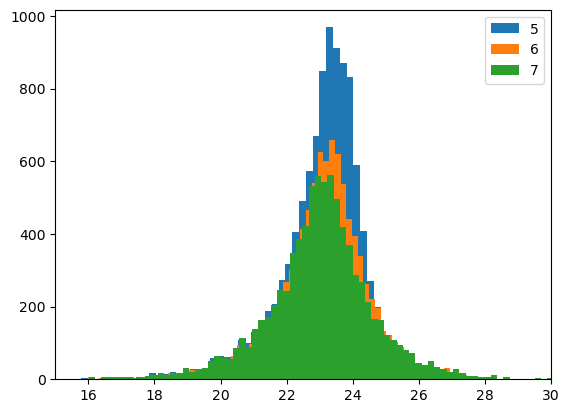

In [207]:
for aper in [5,6,7]:
    tbl = pdr.read('MISWZS22_20403_0261_0005-xd-mcat.fits.gz')
    catmags = tbl['GALEX_MERGED_SOURCE_LIST'][f'NUV_MAG_APER_{aper}'].values
    ix = np.where((catmags>-50) & (catmags<50))
    #catmags[ix]=np.nan
    plt.hist(catmags[ix]+zpmag['NUV'],bins=100,label=aper);
plt.xlim([15,30])
plt.legend();

In [219]:
aper7['aperture_sum_edge']

0        409.887673
1        411.153309
2        411.517166
3        412.012281
4        416.606392
            ...    
11426    399.482180
11427    413.887673
11428    409.522921
11429    406.050962
11430    405.610902
Name: aperture_sum_edge, Length: 11431, dtype: float64

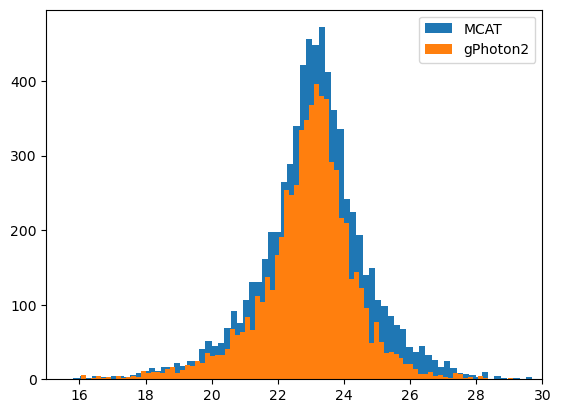

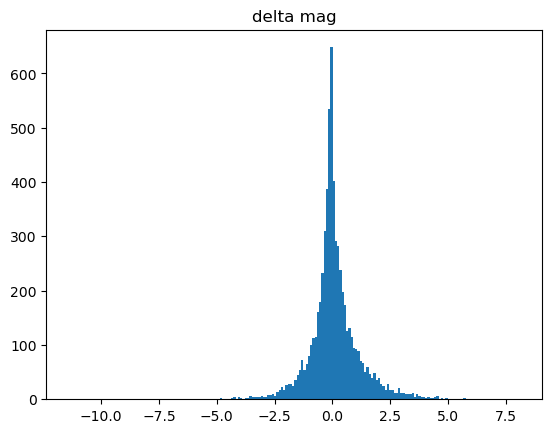

In [220]:
tbl = pdr.read('MISWZS22_20403_0261_0005-xd-mcat.fits.gz')
catmags = tbl['GALEX_MERGED_SOURCE_LIST'][f'NUV_MAG_APER_{aper}'].values
ix = np.where((catmags>-50) & (catmags<50) &
              (aper7['aperture_sum_mask']==0) &
              (aper7['aperture_sum_edge']==0))
#catmags[ix]=np.nan
plt.hist(catmags[ix]+zpmag['NUV'],bins=100,label='MCAT');

cps = aper5['aperture_sum'].values[ix]/expt.expt.sum()
[9.0,12.8,17.3]
bg_counts_aper5 = (9**2)*(aper7['aperture_sum'].values-aper6['aperture_sum'].values)/(17.3**2-12.8**2)
gphot_mag_bgsub = counts2mag((aper5['aperture_sum'].values-bg_counts_aper5)[ix]/expt.expt.sum(),'NUV')
plt.hist(gphot_mag_bgsub,
         bins=100,range=[15,30],label='gPhoton2');
plt.xlim([15,30]);
plt.legend()

plt.figure()
plt.title('delta mag')
plt.hist(catmags[ix]+zpmag['NUV']-gphot_mag_bgsub,bins=200);